# Pymaceuticals Inc.
---

### Analysis

The first thing to notice within our data and testing for Capomulin is that we collected about 30+ more timepoints for it than any other treatment (except for Ramicane). In general this means, we can have a good understanding on how it works over time on the tumors but we cannot reliably compare it to any other treatments other than Ramicane.

I believe, Ramicane is a relatively good drug to compare against Capomulin for three reasons:
    First: they have equal amount of timepoints collected
    Two: They both observed pratically the same average largest tumor volumes
    Three: Their summary statistics for the overall data set is also pratically identical

Capomulin slightly smaller IQR indicates that the middle 50 percent of the data is more tightly grouped. This hints (does not say for certain) that Capomulin may have a more consistent effect on reducing tumor size, when compared to Ramicane.

The data seems to be equally split between male and female, indiciating that gender is not a factor in the drugs effectivness, or lack there of. 

When examining the box plot, we get a visual representation of most of the values for the final tumor volumes for Capomulin fell below the median- meaning most of its final tumor volumes are below its median, which seems to be a better distribution when comapred to Ramicane's box-plot. 

When looking at the average observed tumor volume against weight and calculating the slope, intercept, p-value, r-value, p-value, stderr for both Capomulin and Ramicane, Ramicane as a slighlty lower slope and higher intercept. 

    The slope tells us that for the same increase in weight under both treatments, tumor size grew less under Ramicane. 

    The higher intercept also suggest that, on average, the group of mice within the Ramicane trials may have started out with slightly larger tumors (smaller tumors under the Capomulin trials).

    Capomulin slightly higher r-value also suggest a stronger correlation between the average observed tumor volume and weight.
    These three factors makes me wonder if Ramicane is more effective at controlling tumor size as weight increases. 

There are more questions I have especially concerning age that I did not have time to do. Is there a relationship with age and the effectiveness on the tumor volume with Capomulin? As the mice get older do that increase in weight, increase in weight does seem to indicate a larger tumor size.





In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

m_s_df = pd.merge(study_results,mouse_metadata, how = 'left')

# Display the data table for preview
m_s_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(m_s_df['Mouse ID'].drop_duplicates())


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#m_s_df.groupby(['Mouse ID','Timepoint'])

duplicate_rows = m_s_df.duplicated(subset=['Mouse ID', 'Timepoint'])


for index, value in enumerate(duplicate_rows):
    if value == True:
        print(index)

m_s_df.iloc[137,0]


137
360
681
869
1111


'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mouseid = m_s_df.loc[m_s_df['Mouse ID'] == 'g989', :]
dup_mouseid

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_m_s_df = m_s_df[m_s_df['Mouse ID'] != 'g989']
clean_m_s_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
len(clean_m_s_df['Mouse ID'].drop_duplicates())


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
Drug_Regimen_df = clean_m_s_df.groupby(clean_m_s_df['Drug Regimen'])

mean = Drug_Regimen_df['Tumor Volume (mm3)'].mean()
median = Drug_Regimen_df['Tumor Volume (mm3)'].median()
variance = Drug_Regimen_df['Tumor Volume (mm3)'].var()
std_dev = Drug_Regimen_df['Tumor Volume (mm3)'].std()
sem = Drug_Regimen_df['Tumor Volume (mm3)'].sem()

drug_stats_df =pd.DataFrame({'Mean Tumor Volume': mean, 
                             'Median Tumor Volume': median,
                             'Tumor Volume Variance': variance,
                             'Tumor Volume Std. Dev.': std_dev,
                             'Tumor Volume Std. Err.': sem}) 
drug_stats_df

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_statsagg_df = Drug_Regimen_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_statsagg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

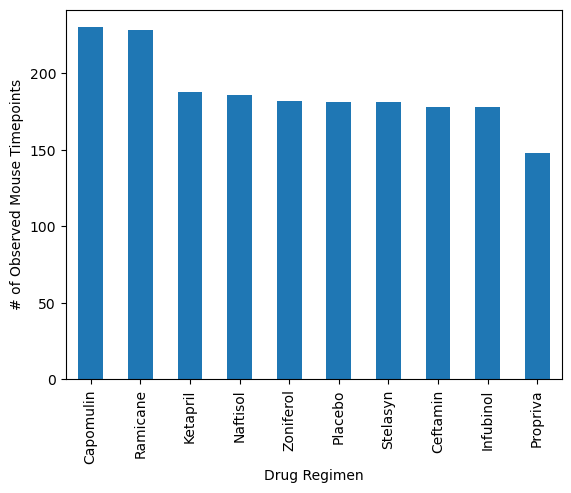

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Mouse_count = Drug_Regimen_df['Timepoint'].count()
#drug_time = clean_m_s_df[['Drug Regimen','Timepoint']]
#drug_time = drug_time.set_index('Drug Regimen')

sorted_Mouse_count = Mouse_count.sort_values(ascending=False)
drug_mouse_chart = sorted_Mouse_count.plot(kind = 'bar')

drug_mouse_chart.set_ylabel('# of Observed Mouse Timepoints')

plt.show()
plt.tight_layout()

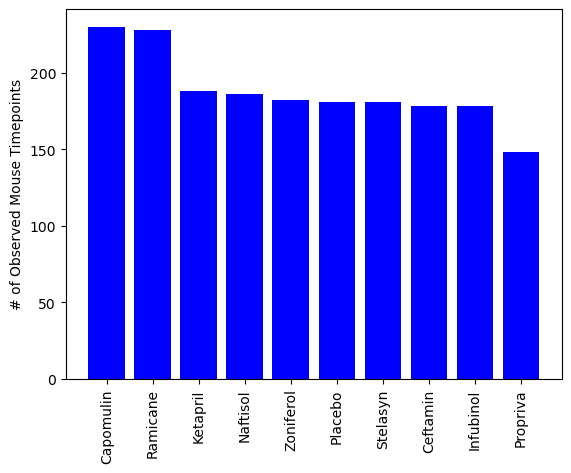

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Mouse_count = Drug_Regimen_df['Timepoint'].count()
y_axis = Mouse_count.sort_values(ascending=False)

x_axis = y_axis.index

plt.bar(x_axis,y_axis, color = 'blue', alpha = 1, align = 'center')
plt.xticks(rotation='vertical')

plt.ylabel('# of Observed Mouse Timepoints')

plt.show()
plt.tight_layout()

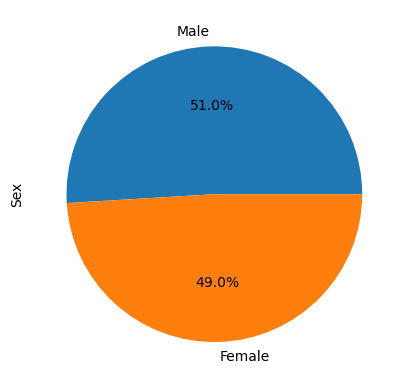

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_m_s_df.groupby(['Sex'])
gender_count = gender['Sex'].count()

gender_count = gender_count.sort_values(ascending=False)

gender_count.plot(kind = 'pie', autopct='%1.1f%%')
plt.show()

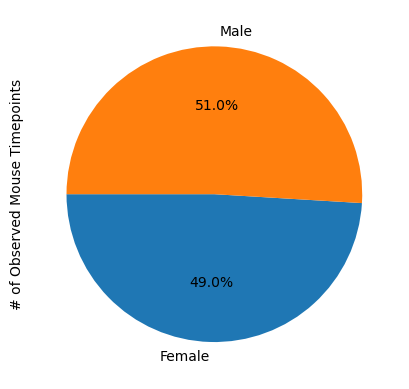

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_m_s_df.groupby(['Sex'])
gender_count = gender['Sex'].count()

label = gender_count.index

plt.pie(gender_count, labels = label, autopct='%1.1f%%', startangle = 180)
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


sorted_drug_df = clean_m_s_df.loc[(clean_m_s_df['Drug Regimen'] == 'Capomulin') |
                              (clean_m_s_df['Drug Regimen'] == 'Ramicane') |
                              (clean_m_s_df['Drug Regimen'] == 'Infubinol') |
                              (clean_m_s_df['Drug Regimen'] == 'Ceftamin')]



# Start by getting the last (greatest) timepoint for each mouse

new_sort_drug_df = sorted_drug_df.groupby('Drug Regimen')

max_timepoints = sorted_drug_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = pd.merge(clean_m_s_df, max_timepoints, on=['Mouse ID', 'Timepoint'], how='inner')
merged_df = merged_df.reset_index(drop=True)

merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

#merged_df = merged_df.set_index('Mouse ID')

for value in treatments:
    tumor_volume = merged_df.loc[merged_df['Drug Regimen'] == value, 'Tumor Volume (mm3)']
    tumor_data.append(tumor_volume)



for value_2, treatment in zip(tumor_data, treatments): 
    quartiles = value_2.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #outliers = value_2[(value_2['Tumor Volume (mm3)'] < lower_bound) | (value_2['Tumor Volume (mm3)'] > upper_bound)]
    outliers = value_2[(value_2< lower_bound) | (value_2> upper_bound)]

    print(f"Treatment: {treatment}")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Value below {lower_bound} could be an outlier")
    print(f"Value above: {upper_bound} could be an outlier")
    if outliers.empty:
        print('No potential outliers')
    else: 
        print(f'Potential Outliers: {outliers} ')
    
    print('__________________________________________________')



 # Determine outliers using upper and lower bounds


Treatment: Capomulin
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Value below 20.70456164999999 could be an outlier
Value above: 51.83201549 could be an outlier
No potential outliers
__________________________________________________
Treatment: Ramicane
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Value below 17.912664470000003 could be an outlier
Value above: 54.30681135 could be an outlier
No potential outliers
__________________________________________________
Treatment: Infubinol
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Value below 36.83290494999999 could be an outlier
Value above: 82.74144559000001 could be an outlier
Potential Outliers: 4    36.321346
Name: Tumor Volume (mm3), dtype: float64 
__________________________________________________
Treatment: Ceftamin
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Value below 25.355449580000002 coul

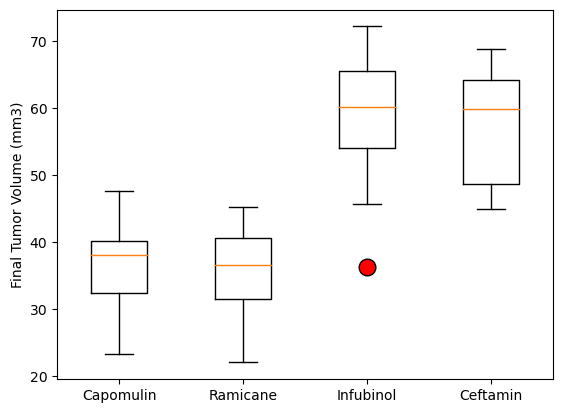

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

tumor_data = []


fig1, ax1 = plt.subplots()

for value in treatments:
    tumor_volume = merged_df.loc[merged_df['Drug Regimen'] == value, 'Tumor Volume (mm3)'].tolist()
    tumor_data.append(tumor_volume)


# plot. Set color of marker edge
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='black')

ax1.boxplot(tumor_data, labels = treatments, flierprops = flierprops )

ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

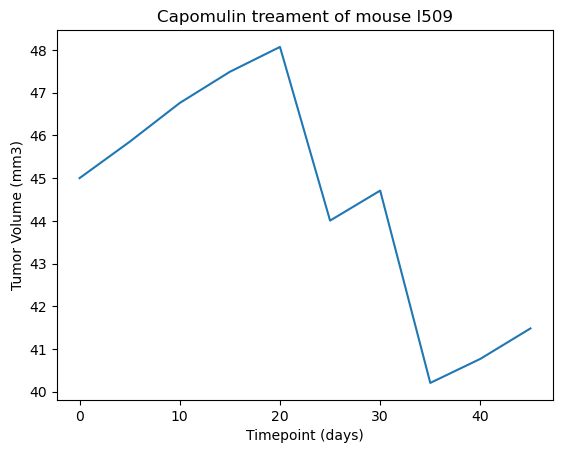

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#print(merged_df.columns)
#merged_df = merged_df.reset_index()

#filter_c = merged_df.loc[(merged_df['Drug Regimen'] == 'Capomulin') &
                         #(merged_df['Mouse ID'] == 'l509'),:]

filter_c = clean_m_s_df.loc[(clean_m_s_df['Drug Regimen'] == 'Capomulin') &
                         (clean_m_s_df['Mouse ID'] == 'l509'),:]


#print(filter_c)


plt.plot(filter_c['Timepoint'], filter_c['Tumor Volume (mm3)'])

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treament of mouse l509')

plt.show()



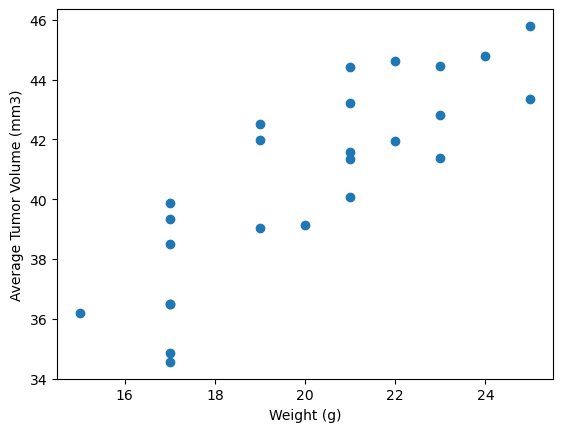

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

filter_c_two = clean_m_s_df.loc[(clean_m_s_df['Drug Regimen'] == 'Capomulin'),:]


avg_w = filter_c_two.groupby('Mouse ID')['Weight (g)'].mean()
avg_T = filter_c_two.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(avg_w, avg_T, marker = 'o' )

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [18]:
from scipy.stats import linregress


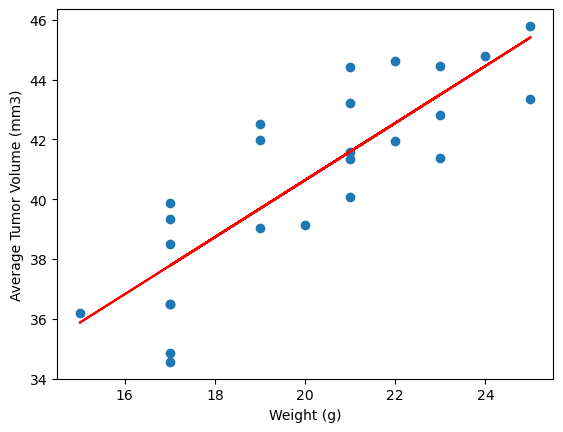

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

filter_c_two = clean_m_s_df.loc[(clean_m_s_df['Drug Regimen'] == 'Capomulin'),:]


x_avg_w = filter_c_two.groupby('Mouse ID')['Weight (g)'].mean()
y_avg_T = filter_c_two.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_avg_w, y_avg_T)

regress_values = x_avg_w * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_avg_w, y_avg_T, marker = 'o' )
plt.plot(x_avg_w,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

My Own Analysis:

In [25]:
Mouse_count = Drug_Regimen_df['Timepoint'].count()

sorted_Mouse_count = Mouse_count.sort_values(ascending=False)
print(sorted_Mouse_count)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64


In [38]:




DR_df = clean_m_s_df.loc[(clean_m_s_df['Drug Regimen'] == 'Capomulin') | (clean_m_s_df['Drug Regimen'] == 'Ramicane') ]

DR_df = DR_df.groupby(DR_df['Drug Regimen'])                  

drug_C_R_df = DR_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_C_R_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955


In [60]:
#new_merge = merged_df.loc[(merged_df['Drug Regimen'] == 'Capomulin') | (merged_df['Drug Regimen'] == 'Ramicane')]
new_merge_c = merged_df.loc[ (merged_df['Drug Regimen'] == 'Capomulin'), ['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen']]
new_merge_r = merged_df.loc[(merged_df['Drug Regimen'] == 'Ramicane'), ['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen']]

#new_merge = new_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].max()
#new_merge = new_merge.groupby('Mouse ID')['Tumor Volume (mm3)'].max()
#new_merge = new_merge.groupby('Mouse ID').max()
new_merge_c = new_merge_c.groupby('Mouse ID').max().mean()
new_merge_r = new_merge_r.groupby('Mouse ID').max().mean()

print(f"Mean Tumor Volume (mm3) for Capomulin: {new_merge_c}")
print(f"Mean Tumor Volume (mm3) for Ramicane: {new_merge_r }")


Mean Tumor Volume (mm3) for Capomulin: Tumor Volume (mm3)    36.667568
dtype: float64
Mean Tumor Volume (mm3) for Ramicane: Tumor Volume (mm3)    36.19139
dtype: float64


/var/folders/6x/3m8fj7gd27z3h9zd6jxjf16w0000gn/T/ipykernel_21891/1358628860.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_merge_c = new_merge_c.groupby('Mouse ID').max().mean()
/var/folders/6x/3m8fj7gd27z3h9zd6jxjf16w0000gn/T/ipykernel_21891/1358628860.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_merge_r = new_merge_r.groupby('Mouse ID').max().mean()


In [23]:
filter_c_two = clean_m_s_df.loc[(clean_m_s_df['Drug Regimen'] == 'Capomulin'),:]


x_avg_w = filter_c_two.groupby('Mouse ID')['Weight (g)'].mean()
y_avg_T = filter_c_two.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_avg_w, y_avg_T)

print(f"Slope:{slope} \nintercept: {intercept} \nrvalue:{rvalue} \npvalue:{pvalue} \nstderr:{stderr}")

Slope:0.9544396890241049 
intercept: 21.552160532685008 
rvalue:0.8419363424694721 
pvalue:1.3225722434712404e-07 
stderr:0.12754359033201323


Slope:0.7696247878472222 
intercept: 25.163491795256984 
rvalue:0.8060300656584948 
pvalue:1.1543697209911325e-06 
stderr:0.11784023082512181


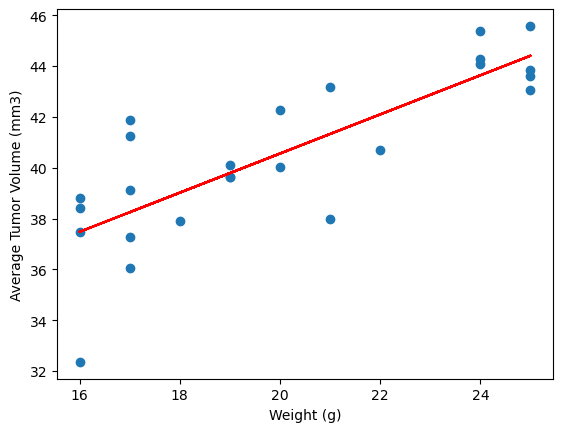

In [63]:
filter_c_three = clean_m_s_df.loc[(clean_m_s_df['Drug Regimen'] == 'Ramicane'),:]


x_avg_w = filter_c_three.groupby('Mouse ID')['Weight (g)'].mean()
y_avg_T = filter_c_three.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_avg_w, y_avg_T)

print(f"Slope:{slope} \nintercept: {intercept} \nrvalue:{rvalue} \npvalue:{pvalue} \nstderr:{stderr}")

regress_values = x_avg_w * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_avg_w, y_avg_T, marker = 'o' )
plt.plot(x_avg_w,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

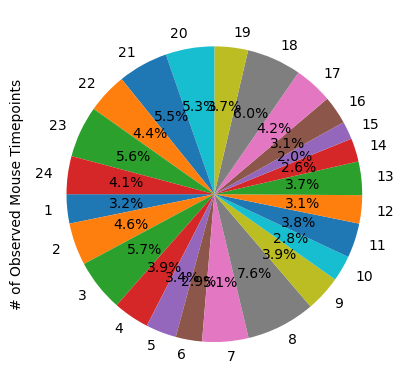

In [61]:
gender = clean_m_s_df.groupby(['Age_months'])
gender_count = gender['Age_months'].count()

label = gender_count.index

plt.pie(gender_count, labels = label, autopct='%1.1f%%', startangle = 180)
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()